In [1]:
import random
import numpy as np
import math
import scipy.special
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def gamma(n):
    return factorial(n-1)

In [6]:
def lambert_w(z):
  """
  Lambert W function, principal branch.
  See http://en.wikipedia.org/wiki/Lambert_W_function
  Code taken from http://keithbriggs.info/software.html
  """
  eps=4.0e-16
  em1=0.3678794411714423215955237701614608
  assert(z>=-em1)
  if 0.0==z: 
      return 0.0
  if z<-em1+1e-4:
      q=z+em1
      r=math.sqrt(q)
      q2=q*q
      q3=q2*q
      return\
       -1.0\
       +2.331643981597124203363536062168*r\
       -1.812187885639363490240191647568*q\
       +1.936631114492359755363277457668*r*q\
       -2.353551201881614516821543561516*q2\
       +3.066858901050631912893148922704*r*q2\
       -4.175335600258177138854984177460*q3\
       +5.858023729874774148815053846119*r*q3\
       -8.401032217523977370984161688514*q3*q
  if z<1.0:
      p=math.sqrt(2.0*(2.7182818284590452353602874713526625*z+1.0))
      w=-1.0+p*(1.0+p*(-0.333333333333333333333+p*0.152777777777777777777777))
  else:
      w=math.log(z)
  if z>3.0: 
      w-=math.log(w)
  for i in range(10):
      e=math.exp(w)
      t=w*e-z
      p=w+1.0
      t/=e*p-0.5*(p+1.0)*t/p
      w-=t
      if abs(t)<eps*(1.0+abs(w)): 
          return w
  raise(AssertionError, 'Unhandled value %1.2f'%z)

def gamma_inverse(x):
  """
  Inverse the gamma function.
  http://mathoverflow.net/questions/12828/inverse-gamma-function
  """
  k=1.461632 # the positive zero of the digamma function, scipy.special.psi
  assert x>=k, 'gamma(x) is strictly increasing for x >= k, k=%1.2f, x=%1.2f' % (k, x)
  C=math.sqrt(2*np.pi)/np.e - scipy.special.gamma(k) # approximately 0.036534
  L=np.log((x+C)/np.sqrt(2*np.pi))
  gamma_inv = 0.5+L/lambert_w(L/np.e)
  return gamma_inv

In [7]:
def plot_func(func, x=np.linspace(0,5,3001)):
    y = np.vectorize(func)(x)
    plt.plot(x, y)
    plt.show()

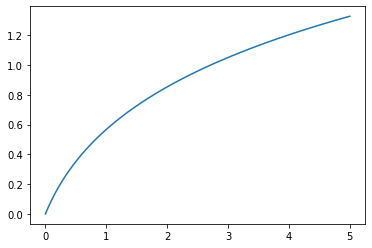

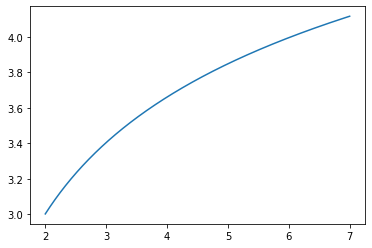

In [8]:
plot_func(lambert_w)
plot_func(gamma_inverse, x=np.linspace(2,7,30001))

In [9]:
def montecarlo_pdfmu0(method='ism'):
    # Generates variable on the distribution
    
    if method == 'ism':
        # Using inverse sampling method: 
        # https://en.wikipedia.org/wiki/Inverse_transform_sampling#The_method

        # We need to calulate inverse of CDF for eqn49
        # https://www.wolframalpha.com/input/?i=e%5E%28-x%2F2%29%2Fsqrt%288%5Cpi+x%29%2Bdelta%28x%29%2F2%3Dy%2C+solve+x

        inp = 1.0 / 8 / math.pi / random.uniform(0,1) ** 2
        return lambert_w(inp)
    
    elif method == 'nd':
        # For n=1, we can just square a number generated along the normal distribution
        # See page 8 of https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19830007824.pdf
        
        return 0.5 * np.random.normal(0, 1) ** 2

In [10]:
def pdfmu0(q_0):
    # Formula for pdf at mu0
    return (8 * math.pi + q_0) ** -0.5 * np.exp(-0.5 * q_0)

In [11]:
# Run it one time to see what we get
montecarlo_pdfmu0()

0.05590229042910466

In [15]:
def plot_distribution(dis, n=10_000, nbins=100, **kwargs):
    points = [dis(**kwargs) for i in range(n)]
    
    ax = plt.gca()
    plt.title(dis.__name__ + str(kwargs))
    plt.hist(points, nbins)
    plt.show()

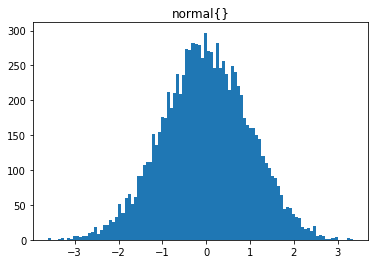

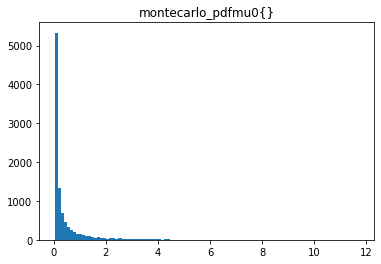

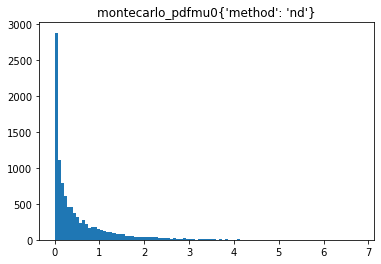

In [16]:
plot_distribution(np.random.normal)
plot_distribution(montecarlo_pdfmu0)
plot_distribution(montecarlo_pdfmu0, method='nd')